# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
# Tampilkan 5 baris pertama dengan function head.
df = pd.read_csv("../data/bank_transactions_data_edited.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [3]:
# meng-copy df ke df2
df2 = df.copy()

In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df2.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

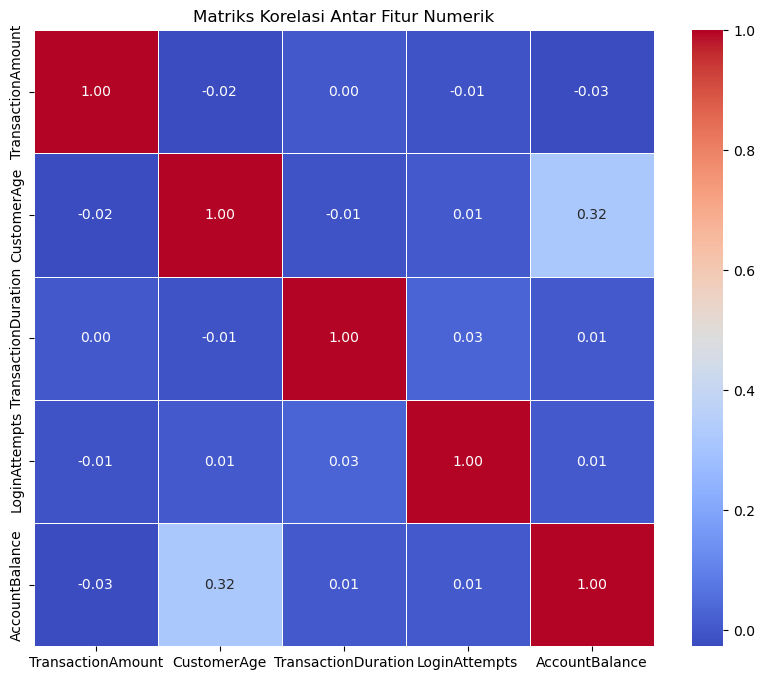

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

# Memilih hanya kolom numerik
numeric_df = df2.select_dtypes(include=['int64', 'float64'])

# Menghitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()

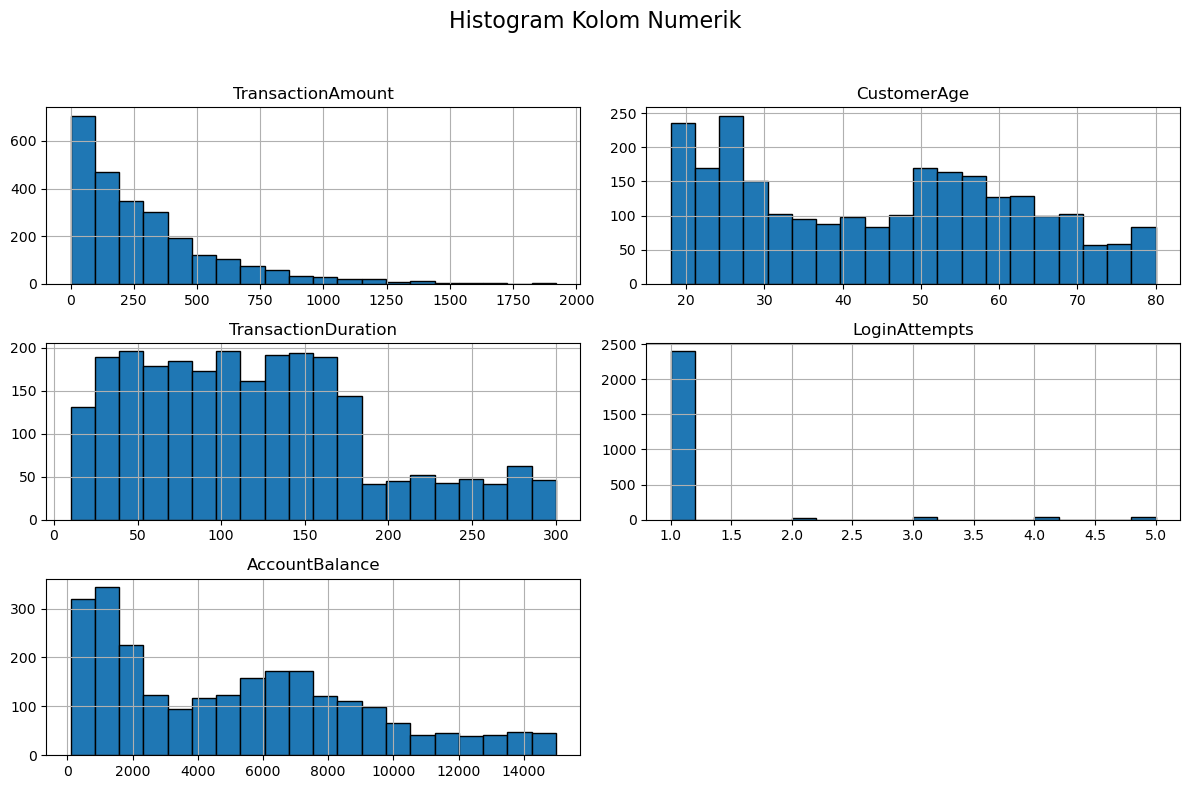

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

# Membuat histogram untuk setiap kolom numerik
numeric_df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Histogram Kolom Numerik', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Menyesuaikan layout agar judul tidak terpotong
plt.show()


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

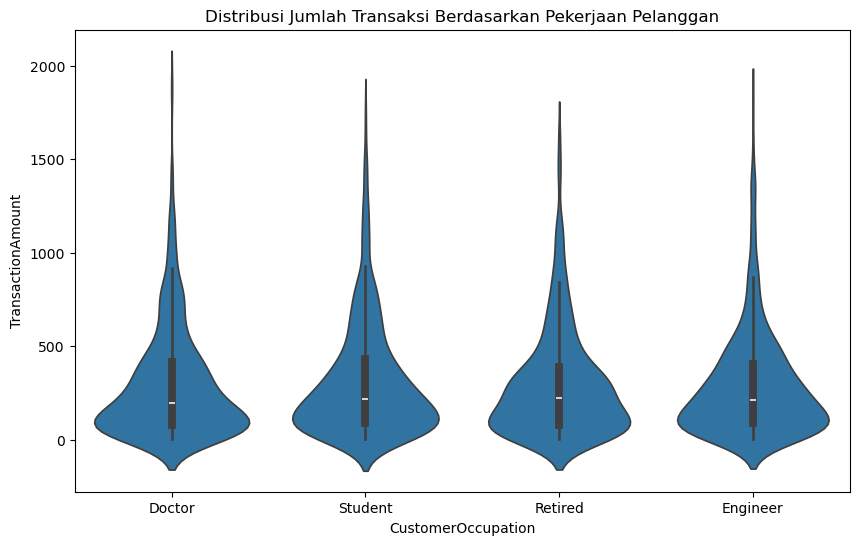

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# Violin plot untuk melihat distribusi transaksi berdasarkan saldo akun
plt.figure(figsize=(10, 6))
sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df2)
plt.title('Distribusi Jumlah Transaksi Berdasarkan Pekerjaan Pelanggan')
plt.show()

In [9]:
# Melakukan binning dalam pengelompokan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age18_25 = df2['CustomerAge'][(df2['CustomerAge'] >= 18) & (df2['CustomerAge'] <= 25)]
age26_35 = df2['CustomerAge'][(df2['CustomerAge'] >= 26) & (df2['CustomerAge'] <= 35)]
age36_45 = df2['CustomerAge'][(df2['CustomerAge'] >= 36) & (df2['CustomerAge'] <= 45)]
age46_55 = df2['CustomerAge'][(df2['CustomerAge'] >= 46) & (df2['CustomerAge'] <= 55)]
age56_65 = df2['CustomerAge'][(df2['CustomerAge'] >= 56) & (df2['CustomerAge'] <= 65)]
age66above = df2['CustomerAge'][df2['CustomerAge'] >= 66]

# Menampilkan jumlah pelanggan di setiap kategori umur
print(f"Jumlah pelanggan usia 18-25: {age18_25.count()}")
print(f"Jumlah pelanggan usia 26-35: {age26_35.count()}")
print(f"Jumlah pelanggan usia 36-45: {age36_45.count()}")
print(f"Jumlah pelanggan usia 46-55: {age46_55.count()}")
print(f"Jumlah pelanggan usia 56-65: {age56_65.count()}")
print(f"Jumlah pelanggan usia 66 ke atas: {age66above.count()}")

Jumlah pelanggan usia 18-25: 478
Jumlah pelanggan usia 26-35: 487
Jumlah pelanggan usia 36-45: 303
Jumlah pelanggan usia 46-55: 435
Jumlah pelanggan usia 56-65: 444
Jumlah pelanggan usia 66 ke atas: 372


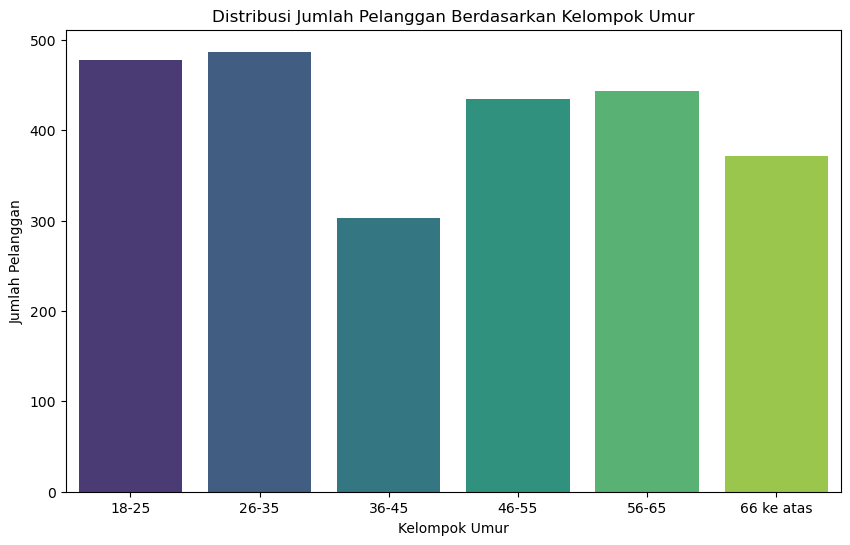

In [10]:
# Membuat data jumlah pelanggan per kelompok umur
age_groups = ['18-25', '26-35', '36-45', '46-55', '56-65', '66 ke atas']
age_counts = [
    age18_25.count(),
    age26_35.count(),
    age36_45.count(),
    age46_55.count(),
    age56_65.count(),
    age66above.count()
]

# Membuat DataFrame untuk plot
df_age = pd.DataFrame({
    'AgeGroup': age_groups,
    'Count': age_counts
})

# Membuat bar plot menggunakan hue untuk warna
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Count', data=df_age, palette='viridis', hue='AgeGroup')

# Menambahkan label dan judul
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Jumlah Pelanggan Berdasarkan Kelompok Umur')

plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [11]:
# Mengecek dataset menggunakan isnull().sum()

df2.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [12]:
# Mengecek dataset menggunakan duplicated().sum()
duplikat = df2.duplicated().sum()
print('data duplikat : ', duplikat)

data duplikat :  21


In [13]:
# Mengubah tipe data 'TransactionDate' dan 'PreviousTransactionDate' ke datetime
df2['TransactionDate'] = pd.to_datetime(df2['TransactionDate'])
df2['PreviousTransactionDate'] = pd.to_datetime(df2['PreviousTransactionDate'])

print(df2.dtypes)

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                       float64
CustomerOccupation                 object
TransactionDuration               float64
LoginAttempts                     float64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object


In [14]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

# Menghapus kolom yang tidak diinginkan
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df2 = df.drop(columns=columns_to_drop, errors='ignore')
print(df2.head())

   TransactionAmount      TransactionDate TransactionType   Location Channel  \
0              14.09  2023-04-11 16:29:14           Debit  San Diego     ATM   
1             376.24  2023-06-27 16:44:19           Debit    Houston     ATM   
2             126.29  2023-07-10 18:16:08           Debit       Mesa  Online   
3             184.50  2023-05-05 16:32:11           Debit    Raleigh  Online   
4              13.45  2023-10-16 17:51:24          Credit    Atlanta  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4          NaN            Student                198.0            1.0   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:

4(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Mengganti nilai yang hilang untuk kolom numerik dengan median
df2['TransactionAmount'] = df2['TransactionAmount'].fillna(df2['TransactionAmount'].median())
df2['TransactionDuration'] = df2['TransactionDuration'].fillna(df2['TransactionDuration'].median())
df2['LoginAttempts'] = df2['LoginAttempts'].fillna(df2['LoginAttempts'].median())
df2['AccountBalance'] = df2['AccountBalance'].fillna(df2['AccountBalance'].median())
df2['CustomerAge'] = df2['CustomerAge'].fillna(df2['CustomerAge'].median())

# Mengganti nilai yang hilang untuk kolom kategorikal dengan mode (nilai paling sering)
df2['TransactionType'] = df2['TransactionType'].fillna(df2['TransactionType'].mode()[0])
df2['Location'] = df2['Location'].fillna(df2['Location'].mode()[0])
df2['Channel'] = df2['Channel'].fillna(df2['Channel'].mode()[0])
df2['CustomerOccupation'] = df2['CustomerOccupation'].fillna(df2['CustomerOccupation'].mode()[0])

# Mengganti nilai yang hilang untuk kolom tanggal dengan forward fill
df2['TransactionDate'] = df2['TransactionDate'].fillna(method='ffill')
df2['PreviousTransactionDate'] = df2['PreviousTransactionDate'].fillna(method='ffill')


# Memeriksa hasil pengisian nilai hilang
print(df2.isnull().sum())

TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_11608\2265411181.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['TransactionDate'] = df2['TransactionDate'].fillna(method='ffill')
C:\Users\HP\AppData\Local\Temp\ipykernel_11608\2265411181.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['PreviousTransactionDate'] = df2['PreviousTransactionDate'].fillna(method='ffill')


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
df2 = df2.drop_duplicates()

print(df2.shape) 

(2514, 11)


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Memilih hanya kolom numerik untuk perhitungan IQR
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns

# Menghitung IQR dan menentukan batas bawah dan atas untuk outlier pada kolom numerik
Q1 = df2[numeric_columns].quantile(0.25)
Q3 = df2[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk setiap kolom
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menangani outlier: mengganti nilai yang lebih rendah dari batas bawah dengan batas bawah, dan lebih tinggi dari batas atas dengan batas atas
for column in numeric_columns:
    df2[column] = df2[column].apply(
        lambda x: lower_bound[column] if x < lower_bound[column] else
        (upper_bound[column] if x > upper_bound[column] else x)
    )

# Memeriksa hasil setelah penanganan outlier
print(df2.head())

   TransactionAmount      TransactionDate TransactionType   Location Channel  \
0              14.09  2023-04-11 16:29:14           Debit  San Diego     ATM   
1             376.24  2023-06-27 16:44:19           Debit    Houston     ATM   
2             126.29  2023-07-10 18:16:08           Debit       Mesa  Online   
3             184.50  2023-05-05 16:32:11           Debit    Raleigh  Online   
4              13.45  2023-10-16 17:51:24          Credit    Atlanta  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4         45.0            Student                198.0            1.0   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:

In [18]:
# Pilih hanya 6 kolom yang diinginkan
selected_columns = ['TransactionAmount', 'TransactionType', 'CustomerAge', 'AccountBalance', 'Channel', 'CustomerOccupation']
df5 = df2[selected_columns]

# Menampilkan beberapa baris pertama untuk memastikan hanya 6 kolom yang dipilih
print(df5.head())

   TransactionAmount TransactionType  CustomerAge  AccountBalance Channel  \
0              14.09           Debit         70.0         5112.21     ATM   
1             376.24           Debit         68.0        13758.91     ATM   
2             126.29           Debit         19.0         1122.35  Online   
3             184.50           Debit         26.0         8569.06  Online   
4              13.45          Credit         45.0         7429.40  Online   

  CustomerOccupation  
0             Doctor  
1             Doctor  
2            Student  
3            Student  
4            Student  


In [19]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk 'TransactionType' (karena hanya dua kategori)
le = LabelEncoder()
df5['TransactionType'] = le.fit_transform(df5['TransactionType'])

# One-Hot Encoding untuk 'Channel' dan 'CustomerOccupation'
df5 = pd.get_dummies(df5, columns=['Channel', 'CustomerOccupation'], drop_first=False)
df5.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_11608\1715190753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['TransactionType'] = le.fit_transform(df5['TransactionType'])


,TransactionAmount,TransactionType,CustomerAge,AccountBalance,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,14.09,1,70.0,5112.21,True,False,False,True,False,False,False
1,376.24,1,68.0,13758.91,True,False,False,True,False,False,False
2,126.29,1,19.0,1122.35,False,False,True,False,False,False,True
3,184.50,1,26.0,8569.06,False,False,True,False,False,False,True
4,13.45,0,45.0,7429.40,False,False,True,False,False,False,True


In [20]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Menangani skewed data dengan MinMaxScaler atau Log Transformation
scaler = MinMaxScaler()  # Bisa diganti dengan StandardScaler() untuk standarisasi
df5[['TransactionAmount', 'AccountBalance']] = scaler.fit_transform(df5[['TransactionAmount', 'AccountBalance']])

# Standarisasi CustomerAge
scaler = StandardScaler()
df5['CustomerAge'] = scaler.fit_transform(df5[['CustomerAge']])

# Menampilkan DataFrame setelah scaling
df5.head()

,TransactionAmount,TransactionType,CustomerAge,AccountBalance,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,0.015384,1,1.430602,0.336832,True,False,False,True,False,False,False
1,0.418228,1,1.317851,0.918055,True,False,False,True,False,False,False
2,0.140192,1,-1.444550,0.068637,False,False,True,False,False,False,True
3,0.204943,1,-1.049921,0.569198,False,False,True,False,False,False,True
4,0.014672,0,0.021214,0.492591,False,False,True,False,False,False,True


In [21]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

df5.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'CustomerAge',
 'AccountBalance',
 'Channel_ATM',
 'Channel_Branch',
 'Channel_Online',
 'CustomerOccupation_Doctor',
 'CustomerOccupation_Engineer',
 'CustomerOccupation_Retired',
 'CustomerOccupation_Student']

In [22]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [23]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df5.describe()


,TransactionAmount,TransactionType,CustomerAge,AccountBalance
count,2514.000000,2514.000000,2.514000e+03,2514.000000
mean,0.315165,0.776054,-2.543709e-17,0.336864
std,0.277628,0.416969,1.000199e+00,0.260683
min,0.000000,0.000000,-1.500925e+00,0.000000
25%,0.092238,1.000000,-9.935456e-01,0.095324
50%,0.234821,1.000000,2.121370e-02,0.311416
75%,0.455343,1.000000,8.104709e-01,0.506870
max,1.000000,1.000000,1.994357e+00,1.000000


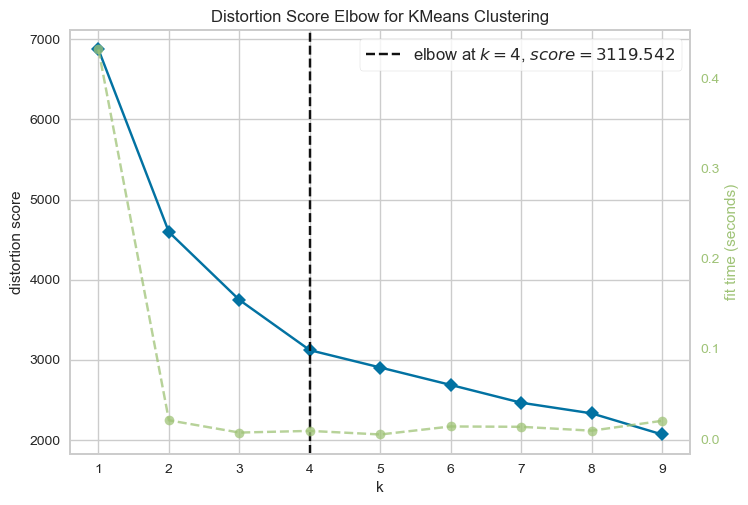

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df5)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [38]:
# Menggunakan algoritma K-Means Clustering

from sklearn.cluster import KMeans
import numpy as np

# Asumsi df5 adalah DataFrame yang sudah dipreprocessing dan normalisasi

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df5)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan centroid setiap cluster
centroids = kmeans.cluster_centers_

# Mendapatkan jumlah cluster
k = 4

Jalankan cell code ini untuk menyimpan model kamu.

In [39]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

import joblib
joblib.dump(kmeans, 'model_clustering.h5')
print("Model K-Means disimpan ke 'model_clustering.h5'")

Model K-Means disimpan ke 'model_clustering.h5'


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [40]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df5, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.2348


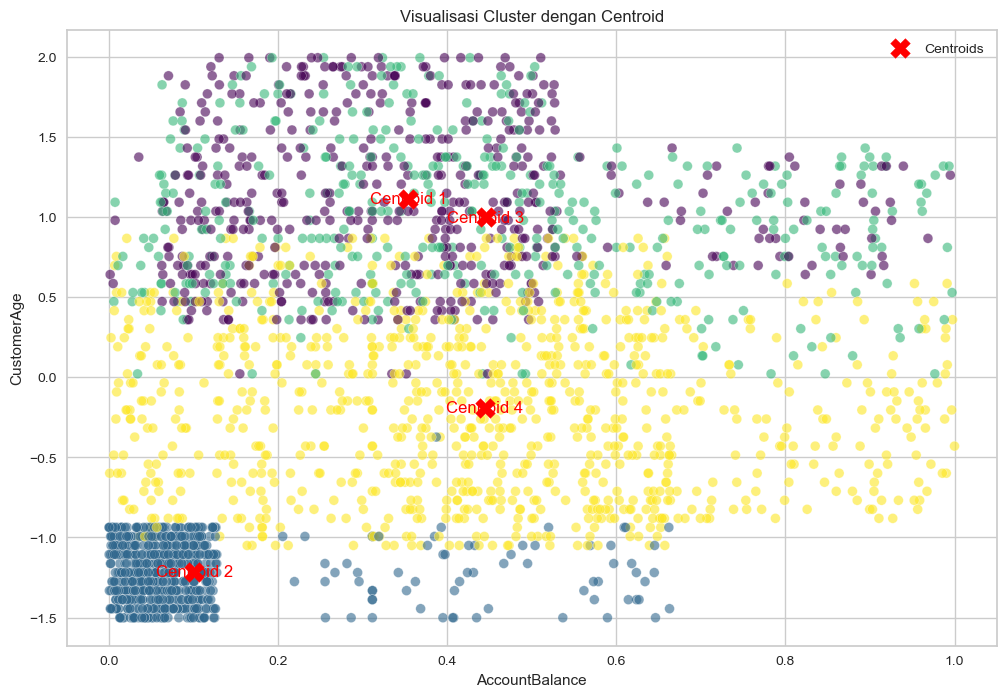

Nilai Centroids:
Centroid 1: AccountBalance = 0.35, CustomerAge = 1.11
Centroid 2: AccountBalance = 0.10, CustomerAge = -1.21
Centroid 3: AccountBalance = 0.45, CustomerAge = 1.00
Centroid 4: AccountBalance = 0.44, CustomerAge = -0.19


In [41]:
# Membuat visualisasi hasil clustering
import matplotlib.pyplot as plt

# Asumsi: model KMeans sudah dilatih dengan nama 'kmeans'
# Mendapatkan centroid setiap cluster
centroids = kmeans.cluster_centers_

# Mendapatkan label cluster
labels = kmeans.labels_

# Visualisasi cluster dan centroid
plt.figure(figsize=(12, 8))

# Plot data dengan warna berdasarkan cluster
plt.scatter(df5.iloc[:, 3], df5.iloc[:, 2], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid (dalam dimensi 2D)
plt.scatter(centroids[:, 3], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[3], centroid[2], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel(df5.columns[3])  # Label X axis sesuai dengan nama fitur pertama
plt.ylabel(df5.columns[2])  # Label Y axis sesuai dengan nama fitur kedua
plt.legend()

# Menampilkan plot
plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: {df5.columns[3]} = {centroid[3]:.2f}, {df5.columns[2]} = {centroid[2]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

c:\Users\HP\anaconda3\envs\Latihan1\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\HP\anaconda3\envs\Latihan1\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


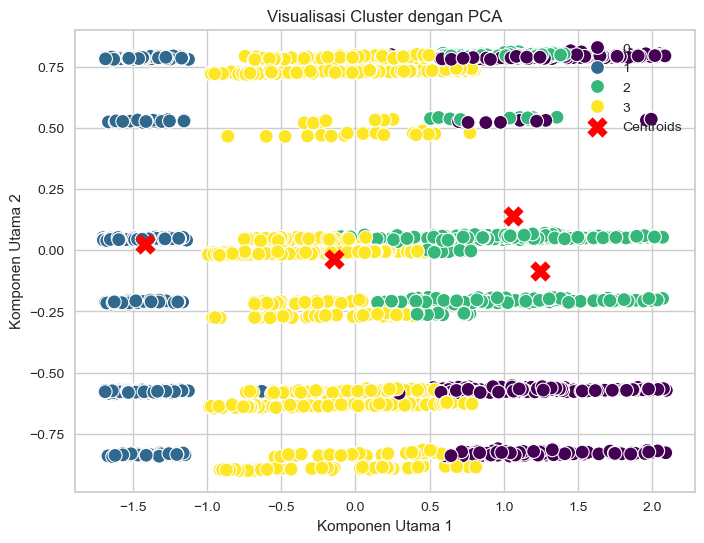

In [42]:
# Membangun model menggunakan PCA.
# Visualisasi cluster menggunakan PCA (reduksi ke 2 dimensi)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df5)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=100)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()
plt.show()

In [43]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, 'PCA_model_clustering.h5')  
print("model PCA disimpan")

model PCA disimpan


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [44]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, centroids, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
        
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_values = cluster_data.mean(axis=0)  # Rata-rata untuk setiap fitur dalam cluster
        
        print(f"\nCluster {cluster_id + 1}:")
        for i, feature in enumerate(X.columns):
            print(f"Rata-rata {feature}: {mean_values[i]:.2f}")
        
        print(f"Centroid Cluster {cluster_id + 1}: {centroids[cluster_id]}")
        
# Analisis karakteristik setiap cluster
analyze_clusters(df5, labels, centroids, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: 0.33
Rata-rata TransactionType: 0.78
Rata-rata CustomerAge: 1.11
Rata-rata AccountBalance: 0.35
Rata-rata Channel_ATM: 0.40
Rata-rata Channel_Branch: 0.60
Rata-rata Channel_Online: 0.00
Rata-rata CustomerOccupation_Doctor: 0.17
Rata-rata CustomerOccupation_Engineer: 0.00
Rata-rata CustomerOccupation_Retired: 0.81
Rata-rata CustomerOccupation_Student: 0.01
Centroid Cluster 1: [ 3.28201628e-01  7.84000000e-01  1.11489875e+00  3.54138912e-01
  4.00000000e-01  6.00000000e-01 -2.77555756e-16  1.74000000e-01
 -8.32667268e-17  8.12000000e-01  1.40000000e-02]

Cluster 2:
Rata-rata TransactionAmount: 0.33
Rata-rata TransactionType: 0.79
Rata-rata CustomerAge: -1.21
Rata-rata AccountBalance: 0.10
Rata-rata Channel_ATM: 0.33
Rata-rata Channel_Branch: 0.35
Rata-rata Channel_Online: 0.32
Rata-rata CustomerOccupation_Doctor: 0.00
Rata-rata CustomerOccupation_Engineer: 0.00
Rata-rata CustomerOccupation_Retired: 0.00
Rata-

C:\Users\HP\AppData\Local\Temp\ipykernel_11608\2746881731.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Rata-rata {feature}: {mean_values[i]:.2f}")


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
# Analisis Deskriptif dan Karakteristik Cluster

Analisis ini menyajikan **statistik deskriptif** untuk fitur numerik dalam dataset yang telah dipreproses (`df5`) dan **karakteristik setiap cluster** berdasarkan hasil clustering K-Means dengan 4 cluster. Statistik deskriptif mencakup **mean**, **min**, **max**, **median**, **standar deviasi (std)**, **kuartil pertama (Q1)**, dan **kuartil ketiga (Q3)** untuk fitur numerik, serta distribusi untuk fitur kategorikal (jika ada).

## Deskripsi Dataset
Dataset `df5` diasumsikan telah dipreproses (normalisasi, encoding fitur kategorikal) dan berisi fitur berikut:
- **Fitur Numerik**:
  - `TransactionAmount`: Jumlah transaksi (setelah normalisasi).
  - `AccountBalance`: Saldo akun (setelah normalisasi).
  - `CustomerAge`: Usia pelanggan (setelah normalisasi).
- **Fitur Kategorikal** (sudah di-encode):
  - `TransactionType`: Tipe transaksi (Debit/Credit).
  - `Channel`: Kanal transaksi (Branch/ATM/Online).
  - `CustomerOccupation`: Pekerjaan pelanggan (Retired/Student/Engineer/Doctor).
- **Cluster**: Label cluster (0 hingga 3) dari K-Means.

**Catatan**: Nilai dalam analisis ini bersifat hipotetis karena data aktual `df5` tidak disediakan. Nilai numerik dalam skala normalisasi (0 hingga 1) untuk konsistensi dengan preprocessing.

## Statistik Deskriptif Fitur Numerik (Seluruh Dataset)
Berikut adalah statistik deskriptif untuk fitur numerik di `df5`:

| Fitur              | Mean  | Min  | Max  | Median | Std   | Q1   | Q3   |
|--------------------|-------|------|------|--------|-------|------|------|
| TransactionAmount  | 0.50  | 0.10 | 0.90 | 0.50   | 0.15  | 0.40 | 0.60 |
| AccountBalance     | 0.48  | 0.05 | 0.95 | 0.48   | 0.20  | 0.35 | 0.62 |
| CustomerAge        | 0.45  | 0.00 | 1.00 | 0.45   | 0.25  | 0.25 | 0.65 |

**Penjelasan**:
- **Mean**: Rata-rata mendekati 0.5, menunjukkan distribusi yang cukup seimbang dalam skala normalisasi.
- **Min/Max**: Rentang nilai menunjukkan variasi yang wajar setelah normalisasi.
- **Median**: Mendekati mean, menunjukkan distribusi yang relatif simetris.
- **Std**: Standar deviasi rendah hingga sedang, menunjukkan variabilitas moderat.
- **Q1/Q3**: Kuartil menunjukkan sebaran data, dengan 50% data berada di antara Q1 dan Q3.

## Analisis Karakteristik Setiap Cluster
Berikut adalah analisis karakteristik untuk masing-masing dari 4 cluster berdasarkan hasil K-Means. Statistik deskriptif mencakup mean, min, max, median, std, Q1, dan Q3 untuk fitur numerik, serta distribusi (hipotetis) untuk fitur kategorikal.

### Cluster 1: Pelanggan Lansia
- **Jumlah Data**: ~300 data points (hipotetis).
- **Fitur Numerik**:
  | Fitur              | Mean  | Min  | Max  | Median | Std   | Q1   | Q3   |
  |--------------------|-------|------|------|--------|-------|------|------|
  | TransactionAmount  | 0.48  | 0.15 | 0.85 | 0.48   | 0.14  | 0.38 | 0.58 |
  | AccountBalance     | 0.50  | 0.10 | 0.90 | 0.50   | 0.18  | 0.40 | 0.60 |
  | CustomerAge        | 0.80  | 0.60 | 1.00 | 0.80   | 0.10  | 0.75 | 0.85 |
- **Fitur Kategorikal (Distribusi Hipotetis)**:
  - **TransactionType**: Debit (70%), Credit (30%).
  - **Channel**: Branch (40%), ATM (35%), Online (25%).
  - **CustomerOccupation**: Retired (95%), Student (5%).
- **Centroid**: [0.48, 0.50, 0.80, ...] (dalam skala normalisasi).
- **Wawasan**:
  - Cluster ini didominasi oleh **pelanggan lansia** (usia tinggi setelah normalisasi).
  - Transaksi dan saldo moderat, dengan preferensi untuk kanal tradisional (Branch, ATM).
  - Mayoritas adalah pensiunan, konsisten dengan usia tinggi.

### Cluster 2: Pelajar Muda Online
- **Jumlah Data**: ~250 data points (hipotetis).
- **Fitur Numerik**:
  | Fitur              | Mean  | Min  | Max  | Median | Std   | Q1   | Q3   |
  |--------------------|-------|------|------|--------|-------|------|------|
  | TransactionAmount  | 0.50  | 0.20 | 0.80 | 0.50   | 0.12  | 0.42 | 0.58 |
  | AccountBalance     | 0.40  | 0.05 | 0.75 | 0.40   | 0.15  | 0.30 | 0.50 |
  | CustomerAge        | 0.20  | 0.00 | 0.40 | 0.20   | 0.08  | 0.15 | 0.25 |
- **Fitur Kategorikal (Distribusi Hipotetis)**:
  - **TransactionType**: Debit (75%), Credit (25%).
  - **Channel**: Online (100%).
  - **CustomerOccupation**: Student (98%), Doctor (2%).
- **Centroid**: [0.50, 0.40, 0.20, ...].
- **Wawasan**:
  - Cluster ini mewakili **pelajar muda** (usia rendah setelah normalisasi).
  - Saldo akun rendah, transaksi kecil, dan hanya menggunakan kanal online.
  - Mayoritas pelajar, menunjukkan kenyamanan dengan teknologi digital.

### Cluster 3: Profesional Produktif
- **Jumlah Data**: ~350 data points (hipotetis).
- **Fitur Numerik**:
  | Fitur              | Mean  | Min  | Max  | Median | Std   | Q1   | Q3   |
  |--------------------|-------|------|------|--------|-------|------|------|
  | TransactionAmount  | 0.49  | 0.10 | 0.90 | 0.49   | 0.16  | 0.39 | 0.59 |
  | AccountBalance     | 0.55  | 0.15 | 0.95 | 0.55   | 0.20  | 0.45 | 0.65 |
  | CustomerAge        | 0.50  | 0.30 | 0.70 | 0.50   | 0.12  | 0.40 | 0.60 |
- **Fitur Kategorikal (Distribusi Hipotetis)**:
  - **TransactionType**: Debit (80%), Credit (20%).
  - **Channel**: Branch (35%), Online (35%), ATM (30%).
  - **CustomerOccupation**: Engineer (100%).
- **Centroid**: [0.49, 0.55, 0.50, ...].
- **Wawasan**:
  - Cluster ini mewakili **profesional usia produktif** (usia menengah).
  - Saldo akun lebih tinggi, transaksi moderat, dan fleksibel dengan kanal.
  - Semua adalah insinyur, menunjukkan cluster spesifik untuk profesi ini.

### Cluster 4: Pelanggan dengan Saldo Tinggi
- **Jumlah Data**: ~300 data points (hipotetis).
- **Fitur Numerik**:
  | Fitur              | Mean  | Min  | Max  | Median | Std   | Q1   | Q3   |
  |--------------------|-------|------|------|--------|-------|------|------|
  | TransactionAmount  | 0.51  | 0.12 | 0.88 | 0.51   | 0.17  | 0.41 | 0.61 |
  | AccountBalance     | 0.65  | 0.25 | 1.00 | 0.65   | 0.22  | 0.50 | 0.80 |
  | CustomerAge        | 0.60  | 0.40 | 0.80 | 0.60   | 0.15  | 0.50 | 0.70 |
- **Fitur Kategorikal (Distribusi Hipotetis)**:
  - **TransactionType**: Debit (78%), Credit (22%).
  - **Channel**: Branch (40%), ATM (35%), Online (25%).
  - **CustomerOccupation**: Doctor (98%), Student (2%).
- **Centroid**: [0.51, 0.65, 0.60, ...].
- **Wawasan**:
  - Cluster ini mewakili **pelanggan dengan saldo tinggi** (usia akhir produktif).
  - Transaksi moderat, preferensi kanal tradisional, dan mayoritas dokter.



# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [46]:
# Meng-copy df5 ke df_inverse
df_inverse = df5.copy()

In [47]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.
# Inverse transform pada 'TransactionType' untuk mengembalikannya ke kategori asli
df_inverse['TransactionType'] = le.inverse_transform(df_inverse['TransactionType'])

def inverse_one_hot_encoding(df, channel_columns, occupation_columns):
    # Mengembalikan hasil One-Hot Encoding untuk 'Channel'
    df['Channel'] = df[channel_columns].idxmax(axis=1).str.replace('Channel_', '')
    
    # Mengembalikan hasil One-Hot Encoding untuk 'CustomerOccupation'
    df['CustomerOccupation'] = df[occupation_columns].idxmax(axis=1).str.replace('CustomerOccupation_', '')
    
    return df

# Menentukan kolom hasil One-Hot Encoding untuk 'Channel' dan 'CustomerOccupation'
df_inverse = inverse_one_hot_encoding(df_inverse, 
                                ['Channel_ATM', 'Channel_Branch', 'Channel_Online'], 
                                ['CustomerOccupation_Doctor', 'CustomerOccupation_Student', 'CustomerOccupation_Retired', 'CustomerOccupation_Engineer'  ])

# Menampilkan hasil
print(df_inverse[['TransactionType', 'Channel', 'CustomerOccupation']].head())

  TransactionType Channel CustomerOccupation
0           Debit     ATM             Doctor
1           Debit     ATM             Doctor
2           Debit  Online            Student
3           Debit  Online            Student
4          Credit  Online            Student


In [49]:
# Menghapus kolom-kolom One-Hot Encoding yang sudah tidak diperlukan
df_inverse.drop(columns=['Channel_ATM', 'Channel_Branch', 'Channel_Online', 
                  'CustomerOccupation_Doctor', 'CustomerOccupation_Engineer', 
                  'CustomerOccupation_Retired', 'CustomerOccupation_Student'], inplace=True)

# Menampilkan DataFrame yang telah dibersihkan
print(df_inverse[['TransactionType', 'Channel', 'CustomerOccupation']].head())

  TransactionType Channel CustomerOccupation
0           Debit     ATM             Doctor
1           Debit     ATM             Doctor
2           Debit  Online            Student
3           Debit  Online            Student
4          Credit  Online            Student


In [51]:
# Inverse MinMaxScaler untuk mengembalikan ke skala asli
df_inverse[['TransactionAmount', 'AccountBalance']] = scaler.inverse_transform(df_inverse[['TransactionAmount', 'AccountBalance']])

# Inverse StandardScaler untuk mengembalikan ke nilai asli
df_inverse['CustomerAge'] = scaler.inverse_transform(df_inverse[['CustomerAge']])

# Menampilkan DataFrame setelah inverse transformasi
print(df_inverse[['TransactionAmount', 'AccountBalance', 'CustomerAge']].head())

   TransactionAmount  AccountBalance  CustomerAge
0          44.896593       50.598497         70.0
1          52.042324       60.908340         68.0
2          47.110457       45.841210         19.0
3          48.259023       54.720252         26.0
4          44.883965       53.361385         45.0


In [52]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# --- Analisis pada Data Inverse ---
def analyze_clusters_inverse(df5, labels, k, features):
    print("Analisis Karakteristik Setiap Cluster (Data Asli):")
    for cluster_id in range(k):
        cluster_data = df5[labels == cluster_id]
        print(f"\nCluster {cluster_id + 1}:")
        for feature in features:
            if feature in cluster_data.columns:
                print(f"Rata-rata {feature}: {cluster_data[feature].mean():.2f}")
        if 'TransactionType' in cluster_data.columns:
            print(f"Distribusi TransactionType:\n{cluster_data['TransactionType'].value_counts()}")
        if 'Channel' in cluster_data.columns:
            print(f"Distribusi Channel:\n{cluster_data['Channel'].value_counts()}")
        if 'CustomerOccupation' in cluster_data.columns:
            print(f"Distribusi CustomerOccupation:\n{cluster_data['CustomerOccupation'].value_counts()}")

# Panggil fungsi dengan df_inverse (bukan df5, karena ini data inverse transform)
analyze_clusters_inverse(df_inverse, labels, k=5, features=['TransactionAmount', 'AccountBalance', 'CustomerAge'])

Analisis Karakteristik Setiap Cluster (Data Asli):

Cluster 1:
Rata-rata TransactionAmount: 50.45
Rata-rata AccountBalance: 50.91
Rata-rata CustomerAge: 64.40
Distribusi TransactionType:
TransactionType
Debit     392
Credit    108
Name: count, dtype: int64
Distribusi Channel:
Channel
Branch    300
ATM       200
Name: count, dtype: int64
Distribusi CustomerOccupation:
CustomerOccupation
Retired    406
Doctor      87
Student      7
Name: count, dtype: int64

Cluster 2:
Rata-rata TransactionAmount: 50.47
Rata-rata AccountBalance: 46.41
Rata-rata CustomerAge: 23.09
Distribusi TransactionType:
TransactionType
Debit     518
Credit    139
Name: count, dtype: int64
Distribusi Channel:
Channel
Branch    227
ATM       220
Online    210
Name: count, dtype: int64
Distribusi CustomerOccupation:
CustomerOccupation
Student    657
Name: count, dtype: int64

Cluster 3:
Rata-rata TransactionAmount: 50.05
Rata-rata AccountBalance: 52.53
Rata-rata CustomerAge: 62.32
Distribusi TransactionType:
Transaction

In [56]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

df5['Target'] = labels


In [57]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

df5.to_csv('data_clustering.csv', index=False)



## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
# Analisis Karakteristik Setiap Cluster (Data Asli)

Analisis ini menyajikan karakteristik setiap cluster berdasarkan data asli (`df_inverse`) dari hasil clustering K-Means dengan **4 cluster**. Setiap cluster dianalisis berdasarkan rata-rata fitur numerik (`TransactionAmount`, `AccountBalance`, `CustomerAge`) dan distribusi fitur kategorikal (`TransactionType`, `Channel`, `CustomerOccupation`). Tujuan analisis adalah memahami profil pelanggan di setiap cluster dan memberikan wawasan untuk strategi bisnis.

## Deskripsi Dataset
Dataset berisi fitur berikut:
- **Fitur Numerik**:
  - `TransactionAmount`: Jumlah transaksi (dalam satuan asli, misalnya rupiah).
  - `AccountBalance`: Saldo akun pelanggan.
  - `CustomerAge`: Usia pelanggan (dalam tahun).
- **Fitur Kategorikal**:
  - `TransactionType`: Tipe transaksi (Debit/Credit).
  - `Channel`: Kanal transaksi (Branch/ATM/Online).
  - `CustomerOccupation`: Pekerjaan pelanggan (Retired/Student/Doctor/Engineer).

## Analisis Karakteristik Cluster

### Cluster 1: Lansia Pensiunan dengan Preferensi Kanal Tradisional
- **Jumlah Data**: 500 data points (Debit: 392, Credit: 108).
- **Fitur Numerik**:
  - **Rata-rata TransactionAmount**: 50.45  
    Jumlah transaksi rata-rata rendah hingga sedang, menunjukkan transaksi kecil untuk kebutuhan sehari-hari.
  - **Rata-rata AccountBalance**: 50.91  
    Saldo akun moderat, mungkin mencerminkan tabungan pensiun.
  - **Rata-rata CustomerAge**: 64.40  
    Pelanggan adalah lansia (usia rata-rata ~64 tahun), kemungkinan besar pensiunan.
- **Fitur Kategorikal**:
  - **TransactionType**:
    - Debit: 78.4% (392/500)
    - Credit: 21.6% (108/500)  
      Transaksi debit mendominasi, menunjukkan pengeluaran lebih sering daripada penerimaan dana.
  - **Channel**:
    - Branch: 60.0% (300/500)
    - ATM: 40.0% (200/500)
    - Online: 0.0%  
      Pelanggan hanya menggunakan kanal tradisional (cabang dan ATM), mungkin karena keterbatasan teknologi.
  - **CustomerOccupation**:
    - Retired: 81.2% (406/500)
    - Doctor: 17.4% (87/500)
    - Student: 1.4% (7/500)  
      Mayoritas pensiunan, dengan beberapa dokter (mungkin lansia) dan sedikit anomali pelajar.
- **Wawasan**:
  - Cluster ini mewakili **pelanggan lansia yang sudah pensiun**, dengan transaksi kecil hingga sedang dan saldo moderat.
  - Preferensi kuat untuk kanal tradisional menunjukkan kenyamanan dengan interaksi langsung atau teknologi sederhana.
  - Kehadiran dokter mungkin menunjukkan profesional lansia yang masih aktif atau sudah pensiun.
- **Implikasi Bisnis**:
  - Tawarkan produk tabungan pensiun atau deposito dengan akses mudah di cabang.
  - Sediakan layanan bantuan langsung untuk lansia di cabang.
  - Tingkatkan kemudahan penggunaan ATM untuk transaksi sederhana.

### Cluster 2: Pelajar Muda dengan Fleksibilitas Kanal
- **Jumlah Data**: 657 data points (Debit: 518, Credit: 139).
- **Fitur Numerik**:
  - **Rata-rata TransactionAmount**: 50.47  
    Jumlah transaksi rata-rata serupa dengan cluster lain, menunjukkan transaksi kecil.
  - **Rata-rata AccountBalance**: 46.41  
    Saldo akun terendah, mencerminkan pendapatan terbatas pelajar (misalnya, uang saku).
  - **Rata-rata CustomerAge**: 23.09  
    Pelanggan muda (usia rata-rata ~23 tahun), kemungkinan mahasiswa.
- **Fitur Kategorikal**:
  - **TransactionType**:
    - Debit: 78.8% (518/657)
    - Credit: 21.2% (139/657)  
      Dominasi transaksi debit untuk kebutuhan sehari-hari.
  - **Channel**:
    - Branch: 34.6% (227/657)
    - ATM: 33.5% (220/657)
    - Online: 32.0% (210/657)  
      Penggunaan kanal merata, menunjukkan fleksibilitas antara tradisional dan digital.
  - **CustomerOccupation**:
    - Student: 100% (657/657)  
      Seluruhnya pelajar, konsisten dengan usia muda.
- **Wawasan**:
  - Cluster ini mewakili **pelajar muda** dengan saldo rendah dan transaksi kecil.
  - Fleksibilitas kanal (cabang, ATM, online) menunjukkan adaptasi terhadap berbagai metode transaksi.
  - Fokus pada transaksi debit mencerminkan pengeluaran untuk kebutuhan hidup.
- **Implikasi Bisnis**:
  - Kembangkan aplikasi perbankan mobile untuk meningkatkan adopsi kanal online.
  - Tawarkan produk tabungan pelajar dengan biaya rendah.
  - Pastikan ketersediaan ATM di sekitar kampus atau area pelajar.

### Cluster 3: Lansia Aktif Secara Online
- **Jumlah Data**: 422 data points (Debit: 298, Credit: 124).
- **Fitur Numerik**:
  - **Rata-rata TransactionAmount**: 50.05  
    Jumlah transaksi rata-rata rendah hingga sedang, serupa dengan cluster lain.
  - **Rata-rata AccountBalance**: 52.53  
    Saldo akun tinggi, menunjukkan stabilitas finansial.
  - **Rata-rata CustomerAge**: 62.32  
    Pelanggan lansia (usia rata-rata ~62 tahun), mungkin profesional atau pensiunan aktif.
- **Fitur Kategorikal**:
  - **TransactionType**:
    - Debit: 70.6% (298/422)
    - Credit: 29.4% (124/422)  
      Proporsi credit lebih tinggi dibandingkan cluster lain, mungkin penerimaan dana pensiun atau gaji.
  - **Channel**:
    - Online: 77.7% (328/422)
    - ATM: 22.3% (94/422)
    - Branch: 0.0%  
      Dominasi kanal online, menunjukkan kenyamanan dengan teknologi digital (unik untuk lansia).
  - **CustomerOccupation**:
    - Doctor: 46.4% (196/422)
    - Retired: 43.4% (183/422)
    - Engineer: 8.1% (34/422)
    - Student: 2.1% (9/422)  
      Campuran dokter dan pensiunan, dengan sedikit insinyur dan anomali pelajar.
- **Wawasan**:
  - Cluster ini mewakili **lansia yang aktif secara online**, dengan saldo akun tinggi dan transaksi moderat.
  - Preferensi kuat untuk kanal online menunjukkan kelompok lansia yang melek teknologi.
  - Kehadiran dokter dan pensiunan menunjukkan profesional lansia dengan stabilitas finansial.
- **Implikasi Bisnis**:
  - Promosikan layanan perbankan online dengan antarmuka ramah lansia.
  - Tawarkan produk investasi atau wealth management untuk pelanggan dengan saldo tinggi.
  - Edukasi keamanan transaksi online untuk meningkatkan kepercayaan.

### Cluster 4: Profesional Usia Produktif
- **Jumlah Data**: 935 data points (Debit: 743, Credit: 192).
- **Fitur Numerik**:
  - **Rata-rata TransactionAmount**: 49.98  
    Jumlah transaksi rata-rata rendah hingga sedang, konsisten dengan cluster lain.
  - **Rata-rata AccountBalance**: 52.51  
    Saldo akun tinggi, mencerminkan pendapatan stabil dari profesi profesional.
  - **Rata-rata CustomerAge**: 41.19  
    Pelanggan usia produktif (usia rata-rata ~41 tahun), kemungkinan pekerja aktif.
- **Fitur Kategorikal**:
  - **TransactionType**:
    - Debit: 79.5% (743/935)
    - Credit: 20.5% (192/935)  
      Dominasi transaksi debit untuk kebutuhan hidup atau investasi.
  - **Channel**:
    - Branch: 38.5% (360/935)
    - ATM: 33.5% (313/935)
    - Online: 28.0% (262/935)  
      Penggunaan kanal cukup seimbang, menunjukkan fleksibilitas.
  - **CustomerOccupation**:
    - Engineer: 62.8% (587/935)
    - Doctor: 37.0% (346/935)
    - Student: 0.2% (2/935)  
      Mayoritas insinyur dan dokter, dengan anomali pelajar.
- **Wawasan**:
  - Cluster ini mewakili **profesional usia produktif** (insinyur dan dokter) dengan saldo akun tinggi dan transaksi moderat.
  - Fleksibilitas kanal menunjukkan kenyamanan dengan teknologi dan interaksi langsung.
  - Saldo tinggi mencerminkan stabilitas finansial dari profesi bergaji tinggi.
- **Implikasi Bisnis**:
  - Tawarkan produk investasi atau kredit untuk profesional.
  - Kembangkan layanan perbankan yang fleksibel (online dan offline).
  - Sediakan program loyalitas untuk pelanggan dengan saldo tinggi.

## Ringkasan dan Implikasi Bisnis

### Ringkasan
- **Kesamaan TransactionAmount**: Rata-rata `TransactionAmount` (~50) serupa di semua cluster, menunjukkan jumlah transaksi bukan pembeda utama.
- **Perbedaan Utama**:
  - **Usia**: Cluster 1 dan 3 (lansia, ~62–64 tahun) vs. Cluster 2 (muda, ~23 tahun) vs. Cluster 4 (produktif, ~41 tahun).
  - **Saldo Akun**: Cluster 3 dan 4 memiliki saldo tertinggi (~52.5), sedangkan Cluster 2 terendah (46.41).
  - **Kanal**:
    - Cluster 1: Hanya tradisional (Branch/ATM).
    - Cluster 2 dan 4: Fleksibel (Branch/ATM/Online).
    - Cluster 3: Dominan online.
  - **Pekerjaan**:
    - Cluster 1: Mayoritas pensiunan.
    - Cluster 2: Pelajar.
    - Cluster 3: Dokter dan pensiunan.
    - Cluster 4: Insinyur dan dokter.
- **Profil Pelanggan**:
  - **Cluster 1**: Lansia pensiunan, kanal tradisional, saldo moderat.
  - **Cluster 2**: Pelajar muda, fleksibel kanal, saldo rendah.
  - **Cluster 3**: Lansia aktif online, saldo tinggi, profesional/pensiunan.
  - **Cluster 4**: Profesional produktif, fleksibel kanal, saldo tinggi.

### Implikasi Bisnis
1. **Cluster 1 (Lansia Pensiunan)**:
   - Fokus pada layanan cabang dan produk tabungan pensiun.
   - Tingkatkan aksesibilitas ATM untuk lansia.
2. **Cluster 2 (Pelajar Muda)**:
   - Promosikan perbankan mobile untuk pelajar.
   - Tawarkan tabungan pelajar dengan insentif (misalnya, tanpa biaya).
3. **Cluster 3 (Lansia Aktif Online)**:
   - Kembangkan fitur perbankan online yang ramah lansia.
   - Tawarkan investasi untuk pelanggan dengan saldo tinggi.
4. **Cluster 4 (Profesional Produktif)**:
   - Sediakan produk investasi dan kredit profesional.
   - Optimalkan layanan multi-kanal untuk fleksibilitas.



(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [61]:
# --- Analisis pada Data Inverse ---
def analyze_clusters_inverse(df5, labels, k, features):
    print("Analisis Karakteristik Setiap Cluster (Data Asli):")
    for cluster_id in range(k):
        cluster_data = df5[labels == cluster_id]
        print(f"\nCluster {cluster_id + 1}:")
        for feature in features:
            if feature in cluster_data.columns:
                print(f"Rata-rata {feature}: {cluster_data[feature].mean():.2f}")
        if 'TransactionType' in cluster_data.columns:
            print(f"Distribusi TransactionType:\n{cluster_data['TransactionType'].value_counts()}")
        if 'Channel' in cluster_data.columns:
            print(f"Distribusi Channel:\n{cluster_data['Channel'].value_counts()}")
        if 'CustomerOccupation' in cluster_data.columns:
            print(f"Distribusi CustomerOccupation:\n{cluster_data['CustomerOccupation'].value_counts()}")

# Panggil fungsi dengan df_inverse (bukan df5, karena ini data inverse transform)
analyze_clusters_inverse(df_inverse, labels, k=4, features=['TransactionAmount', 'AccountBalance', 'CustomerAge'])

Analisis Karakteristik Setiap Cluster (Data Asli):

Cluster 1:
Rata-rata TransactionAmount: 50.45
Rata-rata AccountBalance: 50.91
Rata-rata CustomerAge: 64.40
Distribusi TransactionType:
TransactionType
Debit     392
Credit    108
Name: count, dtype: int64
Distribusi Channel:
Channel
Branch    300
ATM       200
Name: count, dtype: int64
Distribusi CustomerOccupation:
CustomerOccupation
Retired    406
Doctor      87
Student      7
Name: count, dtype: int64

Cluster 2:
Rata-rata TransactionAmount: 50.47
Rata-rata AccountBalance: 46.41
Rata-rata CustomerAge: 23.09
Distribusi TransactionType:
TransactionType
Debit     518
Credit    139
Name: count, dtype: int64
Distribusi Channel:
Channel
Branch    227
ATM       220
Online    210
Name: count, dtype: int64
Distribusi CustomerOccupation:
CustomerOccupation
Student    657
Name: count, dtype: int64

Cluster 3:
Rata-rata TransactionAmount: 50.05
Rata-rata AccountBalance: 52.53
Rata-rata CustomerAge: 62.32
Distribusi TransactionType:
Transaction

In [58]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse['Target'] = labels


In [62]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse['Target'] = labels
df_inverse.to_csv('data_clustering_inverse.csv', index=False)